In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats
from sklearn.metrics import silhouette_score
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

## Importar datos

Se van a importar los ficheros extraídos del Laboratorio de Datos de Gephi que contienen las listas de nodos y aristas que conforman la red de interacciones: 

- **Nodos**: este archivo contiene las características de cada usuario extraídas por Communalytic junto con las métricas de centralidad y las comunidades computadas en Gephi.

- **Aristas**: el conjunto de datos contiene una lista con las interacciones entre usuarios y las características extraídas por Communalytic, como el tipo de interacción, la fecha, la dirección de la publicación o el contenido del mensaje. 

In [3]:
# Importar ficheros de nodos y aristas
edges_file = pd.read_csv("podcasts_edges.csv", header=0, sep=",")
nodes_file = pd.read_csv("podcasts_nodes.csv", header=0, sep=",")

In [4]:
edges_file.head()

,Source,Target,Type,Id,Label,Weight,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0,1,Directed,0,NaN,2,2025-04-13,"<[2025-04-13, 2025-04-13]>",https://bsky.app/profile/punzadas.bsky.social/...,0,0,0,0,0,0,0,0,Esto es casi ya !!! ❤️,quoted,7
1,0,2,Directed,2,NaN,1,2025-04-22,"<[2025-04-22, 2025-04-22]>",https://bsky.app/profile/punzadas.bsky.social/...,0,0,0,0,0,0,0,0,Oooops,replied_to,1
2,0,3,Directed,3,NaN,5,2025-04-04,"<[2025-04-04, 2025-04-04]>",https://bsky.app/profile/punzadas.bsky.social/...,0,0,0,0,0,0,0,0,con carita,quoted,9
3,0,4,Directed,8,NaN,1,2025-04-16,"<[2025-04-16, 2025-04-16]>",https://bsky.app/profile/punzadas.bsky.social/...,0,0,0,0,0,0,0,0,AMIGAS DE VALENCIA\n\nnos vemos prontito jeje,quoted,3
4,0,5,Directed,9,NaN,2,2024-11-17,"<[2024-11-17, 2024-11-17]>",https://bsky.app/profile/punzadas.bsky.social/...,0,0,0,0,0,0,0,0,esos también son nuestros podcasts favoritos,quoted,52


In [5]:
nodes_file.head()

,Id,Label,0,1,2,3,4,5,6,componentnumber,...,harmonicclosnesscentrality,betweenesscentrality,Authority,Hub,pageranks,strongcompnum,modularity_class,stat_inf_class,clustering,eigencentrality
0,71,eldiario.es,1,59.086090,-56.779053,8.576470,717,0,"rgb(1,115,178)",0,...,0.000000,0.000000,0.920711,0.000000,0.024930,0,11,1,0.001597,1.000000
1,45,carnecrudaradio.bsky.social,3,-60.446854,86.535301,8.359574,577,14,"rgb(2,158,115)",0,...,0.319909,237968.883333,0.359771,0.035811,0.024023,114,2,1,0.002065,0.810783
2,30,sarariveiro.bsky.social,2,-56.657166,203.688522,8.293419,540,110,"rgb(222,143,5)",0,...,0.594792,399094.533333,0.075902,0.056267,0.029727,114,22,1,0.002100,0.942685
3,1246,elmundotoday.com,1,-196.528412,-52.630035,7.525453,250,2,"rgb(1,115,178)",0,...,1.000000,565.083333,0.049424,0.002391,0.007907,54,0,1,0.000316,0.254775
4,166,juanlusanchez.bsky.social,6,115.416168,-40.601414,7.451038,232,53,"rgb(202,145,97)",0,...,0.426841,207980.450000,0.048776,0.000322,0.013216,114,3,1,0.004606,0.350833


In [6]:
# Seleccionar columnas
edges = edges_file[['Source', 'Target', 'Weight']]
nodes = nodes_file[["Id", "Label", "0"]]

In [7]:
print('Number of nodes: ', len(nodes['Id'].unique()))
print('Number of edges: ', edges.shape[0])

Number of nodes:  6086
Number of edges:  7939


---------------
## Análisis exploratorio de los datos

El análisis exploratorio se ha centrado en las métricas de centralidad de los nodos, calculadas desde el panel de Estadísticas de Gephi. 

In [9]:
centrality_ls = ['degree', 'indegree', 'outdegree', 'weighted degree', 'weighted indegree','weighted outdegree', 'betweenesscentrality', 'closnesscentrality', 'eigencentrality', 'Authority', 'Hub', 'pageranks']
# Resumen de los valores de centralidad
nodes_file[centrality_ls].describe()

,degree,indegree,outdegree,weighted degree,weighted indegree,weighted outdegree,betweenesscentrality,closnesscentrality,eigencentrality,Authority,Hub,pageranks
count,6086.000000,6086.000000,6086.000000,6086.000000,6086.000000,6086.000000,6086.000000,6086.000000,6086.000000,6086.000000,6086.000000,6086.000000
mean,2.608939,1.304469,1.304469,3.182386,1.591193,1.591193,341.399770,0.578314,0.003776,0.000384,0.005855,0.000114
std,17.378607,16.405787,1.917305,26.118772,22.241052,5.240680,7524.496754,0.346041,0.026314,0.012814,0.011404,0.000731
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000042
25%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.249591,0.000000,0.000000,0.000000,0.000042
50%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000382,0.000042
75%,2.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.002773,0.000042
max,719.000000,718.000000,111.000000,1354.000000,999.000000,355.000000,399094.533333,1.000000,1.000000,0.920711,0.057309,0.029727


A continuación se muestra un ranking de los principales usuarios según cada una de las métricas de centralidad. Los usuarios se han coloreado por la comunidad a la que pertenecen. La paleta de colores se ha extraído programáticamente de Gephi, y el fichero CVS con la relación entre las comunidades y los colores en formato RGB se ha incluido en el material suplementario del trabajo. 

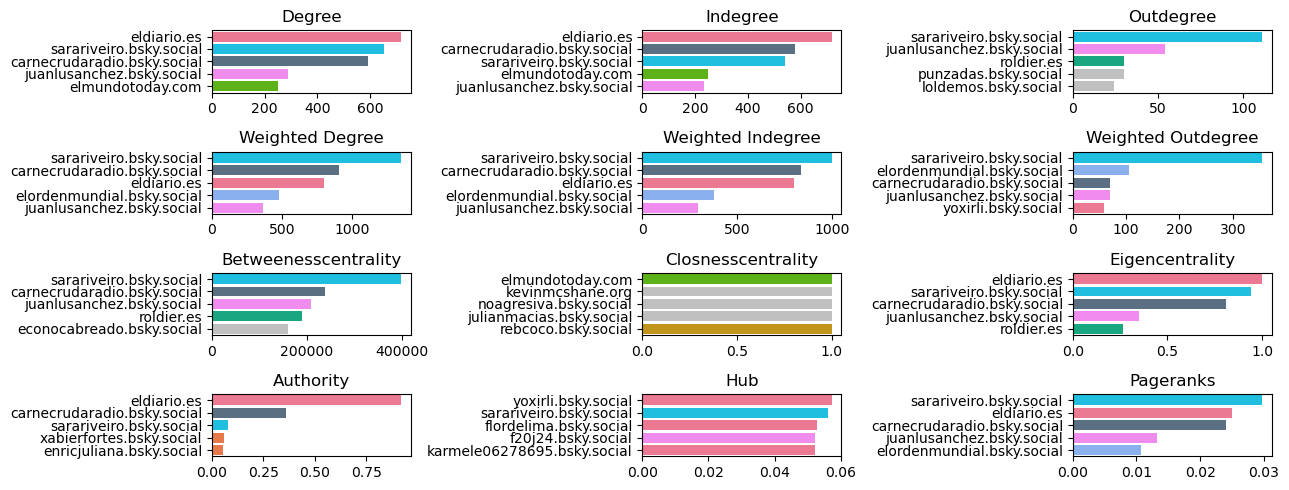

In [11]:
# Cargar el CSV
color_df = pd.read_csv("modularity_colors.csv")

# Convertir la columna "rgb_color" en formato "R,G,B" a hexadecimal
def rgb_to_hex(rgb_str):
    r, g, b = map(int, rgb_str.split(','))
    return '#{:02X}{:02X}{:02X}'.format(r, g, b)

# Crear paleta
color_df['hex_color'] = color_df['rgb_color'].apply(rgb_to_hex)
modularity_palette = dict(zip(color_df['modularity_class'], color_df['hex_color']))

# Crear las subplots
fig, axs = plt.subplots(4, 3, figsize=(13, 5))
axs = axs.flatten()

# Representar las 5 cuentas con mayor centralidad para cada métrica
for i, centrality in enumerate(centrality_ls):
    top5 = nodes_file.nlargest(5, centrality).copy() 
    sns.barplot(
        data=top5,
        x=centrality,
        y='Label',
        hue='modularity_class',
        dodge=False,
        palette=modularity_palette,
        ax=axs[i]
    )
    axs[i].set_title(centrality.replace('_', ' ').title())
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].legend_.remove()

plt.tight_layout()
plt.savefig('Figures/top5_centrality.png')
plt.savefig('Figures/top5_centrality.svg')
plt.show()

A continuación, se ha repetido el análisis con las métricas calculadas como si el grafo fuera no dirigido. Al igual que los valores anteriores, las métricas se extrayeron de Gephi. Estas métricas solo se van a utilizar con fines exploratorios, para el resto de análisis se utilizarán los valores dirigidos. 

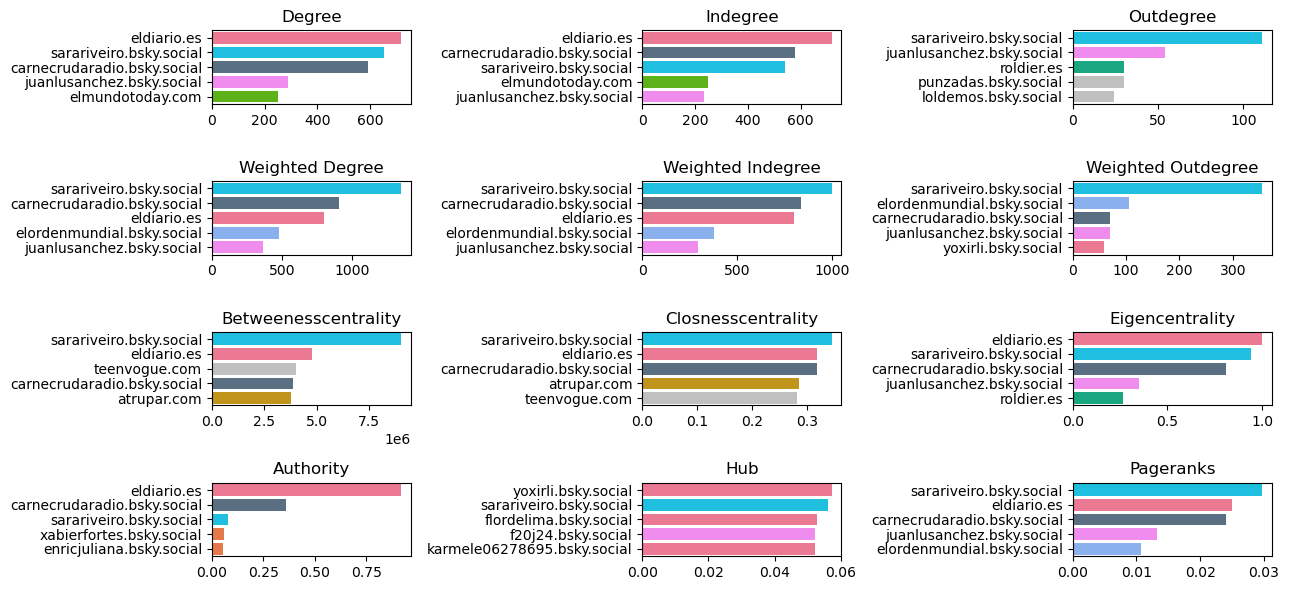

In [13]:
# Importar las métricas no dirigidas
nodes_file_undirected = pd.read_csv("podcasts_nodes_undirected.csv", header=0, sep=",")

# Crear las subplots
fig, axs = plt.subplots(4, 3, figsize=(13, 6))
axs = axs.flatten()

# Dibujar los barplots
for i, centrality in enumerate(centrality_ls):
    top5 = nodes_file_undirected.nlargest(5, centrality).copy()
    sns.barplot(
        data=top5,
        x=centrality,
        y='Label',
        hue='modularity_class',
        dodge=False,
        palette=modularity_palette,
        ax=axs[i]
    )
    axs[i].set_title(centrality.replace('_', ' ').title())
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].legend_.remove()

plt.tight_layout()
plt.savefig('Figures/top5_centrality_undirected.svg')
plt.show()

-------------
## EQUIVALENCIA ESTRUCTURAL

En esta sección, se analizó la similitud estructural entre los pares de nodos de la red de interacciones, sin diferenciar entre comunidades o clústeres. 

## Crear matriz de adyacencia (con pesos)

En primer lugar, se construyó la matriz de adyacencia a partir de la tabla de aristas. Los valores de las filas y las colunas representan cada uno de los nodos, mientras que los valores de las celdas representan la intensidad de las conexiones, medida como el número de interacciones entre los usuarios. Por lo tanto, cada una de las filas de la matriz representa el vector de interacciones de un usuario. Al considerar la direccionalidad de las interacciones, la matriz resultante es asimétrica. 

In [16]:
# Crear matriz de adyacencia directamente a partir del DataFrame edges
ady = pd.pivot_table(
    edges,
    index='Source',
    columns='Target',
    values='Weight',
    fill_value=0
)

# Asegurar que todos los nodos estén en filas y columnas
node_list = nodes['Id'].tolist()
ady = ady.reindex(index=node_list, columns=node_list, fill_value=0)

# Guardar matriz de adyacencia
ady.to_csv('podcasts_ady.csv')

# Mostrar matriz de adyacencia
ady

Target,71,45,30,1246,166,140,847,5318,3139,6251,...,6412,6415,6416,6417,6418,6419,6420,6421,6422,6423
Source,,,,,,,,,,,,,,,,,,,,,
71,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,2.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,3.0,6.0,164.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6419,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6420,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6421,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
ady = pd.read_csv('podcasts_ady.csv', index_col=0)

## Cálculo de la similitud

A partir de la matriz de adyacencia se calculó el coeficiente de correlación de Pearson entre los pares de nodos. 

In [19]:
# Calcular correlación de Pearson
node_list = nodes['Id'].tolist()
matrix = np.corrcoef(ady)
ady_pearson = pd.DataFrame(matrix, index=node_list, columns=node_list)
# Guardar correlación
ady_pearson.to_csv('podcasts_ady_pearson.csv')

C:\Users\anaso\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\anaso\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Debido a la presencia de usuarios que no actúan como emisores, solo como receptores y viceversa, algunos filas estaban compuestas únicamente por 0s, impidiendo el cálculo del coeficiente de correlación de Pearson. Para sortear este problema, se han sustituido los valores nulos en la matriz de correlaciones por 0s.

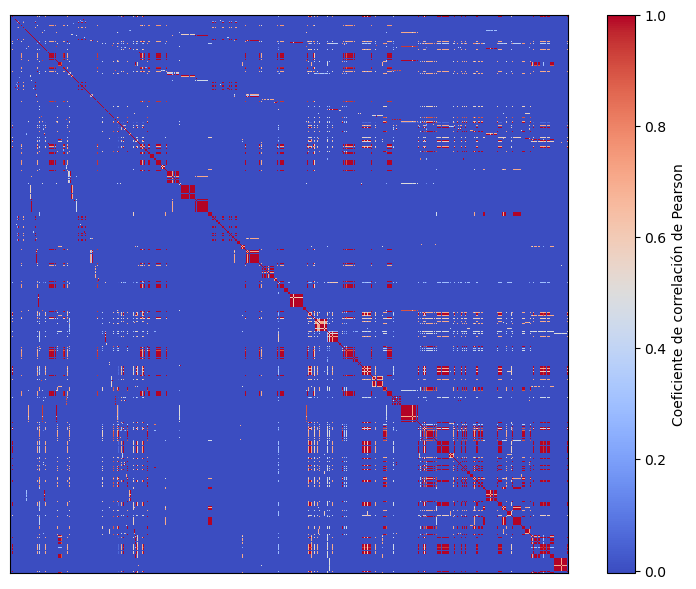

In [21]:
# Crear el mapa de color (heatmap)
ady_pearson = ady_pearson.fillna(0)
plt.figure(figsize=(8, 6))
plt.imshow(ady_pearson, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Coeficiente de correlación de Pearson')
# plt.xticks(ticks=range(len(node_list)), labels=nodes['Id'].tolist(), rotation=45)
# plt.yticks(ticks=range(len(node_list)), labels=nodes['Id'].tolist())
plt.xticks([]) 
plt.yticks([])  
plt.tight_layout()
plt.savefig('Figures/podcast_pearson.svg', dpi=300, bbox_inches='tight')
plt.show()

También se ha representado la matriz de correlaciones ordenando los nodos por la comunidad a la que han sido asignados. De esta manera, se pueden intuir las comunidades como las regiones de individuos con mayor similitud estructural entre sí, en comparación con los usuarios de otros grupos.  

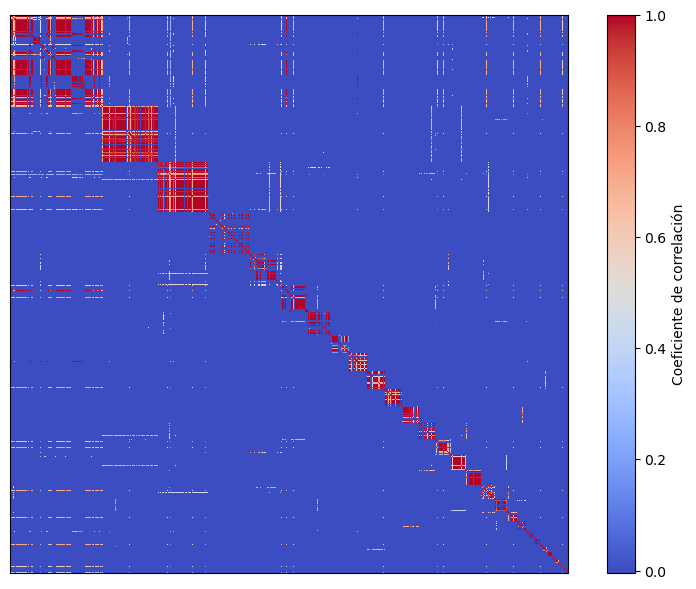

In [23]:
# Asegurarnos de que los índices coincidan
nodes = nodes.set_index('Id')
ordered_nodes = nodes.sort_values(by='0').index.tolist()

# Reordenar la matriz de correlación
ady_sorted = ady_pearson.loc[ordered_nodes, ordered_nodes]
ady_sorted = ady_sorted.fillna(0)

# Crear el heatmap ordenado
plt.figure(figsize=(8, 6))
plt.imshow(ady_sorted, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Coeficiente de correlación')
plt.xticks([]) 
plt.yticks([]) 
plt.tight_layout()
plt.savefig('Figures/podcast_pearson_communities.svg', dpi=300, bbox_inches='tight')
plt.show()

------------------------
## MODULARIDAD

El análisis de similitud estructural se repitió de forma individual para las comunidades detectadas por el algoritmo de detección de comunidades basado en modularidad. 

In [25]:
print('Number of communities: ', len(nodes_file['modularity_class'].unique()))

Number of communities:  33


Se puede observar que las cinco cuentas que se usaron como semillas para construir la red han sido asignadas a comunidades diferentes, como era de esperar. 

In [27]:
podcast_bsky = ['sarariveiro.bsky.social', 'juanlusanchez.bsky.social', 'carnecrudaradio.bsky.social', 
               'punzadas.bsky.social', 'elordenmundial.bsky.social']
podcasts_modularity = nodes_file[nodes_file['Label'].isin(podcast_bsky)][['Id', 'Label', 'modularity_class']]
podcasts_modularity

,Id,Label,modularity_class
1,45,carnecrudaradio.bsky.social,2
2,30,sarariveiro.bsky.social,22
4,166,juanlusanchez.bsky.social,3
5,140,elordenmundial.bsky.social,8
40,0,punzadas.bsky.social,13


A continuación, se muestran las comunidades ordenadas por su tamaño. 

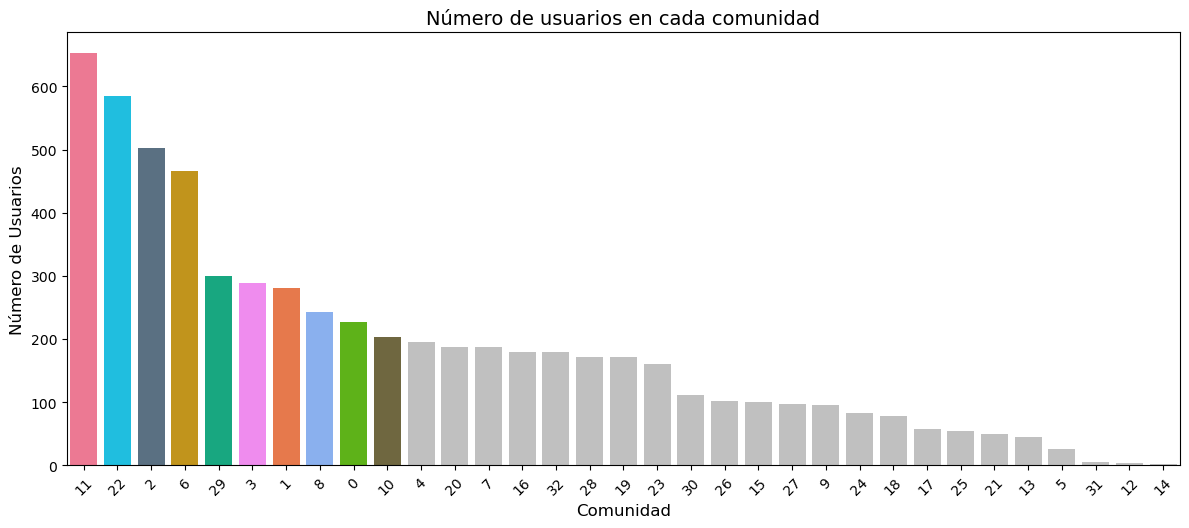

In [29]:
nodes_by_module = nodes_file.groupby('modularity_class', as_index=False)['Id'].count().sort_values('Id', ascending=False)

# Visualización del número de nodos por comunidad
plt.figure(figsize=(12, 7))
sns.barplot(x='modularity_class', y='Id', 
            data=nodes_by_module, 
            palette=modularity_palette,
            hue='modularity_class',
            order=nodes_by_module.sort_values('Id', ascending=False).modularity_class)

# Configuramos el título y etiquetas
plt.title('Número de usuarios en cada comunidad', fontsize=14)
plt.xlabel('Comunidad', fontsize=12)
plt.ylabel('Número de Usuarios', fontsize=12)

# Mejoramos la visualización y evitamos que las etiquetas se solapen
plt.xticks(rotation=45)
#plt.axhline(200, color='gray', linestyle='--', linewidth=1)


# Ajustamos el diseño
plt.tight_layout()
plt.legend().remove()
plt.grid(False)

# Mostrar el gráfico
plt.savefig('Figures/modularity_users_by_community.svg')
plt.show()

### Similitud estructural

Para estudiar la similitud estructural dentro de cada comunidad se partió de la matriz de correlaciones construida en el apartado anterior y se segmentó por comunidades. 

In [31]:
# Obtener los nodos y las comunidades
node_list = nodes_file['Id'].tolist()
communities = nodes_file['modularity_class'].tolist()

# Crear un diccionario que agrupe los nodos por comunidad
community_dict = {}
for node, community in zip(node_list, communities):
    if community not in community_dict:
        community_dict[community] = []
    community_dict[community].append(node)

# Calcular la similitud promedio dentro de cada comunidad
community_similarities = {}

for community, nodes_in_community in community_dict.items():
    # Filtramos las filas y columnas correspondientes a los nodos de esta comunidad
    submatrix = ady_pearson.loc[nodes_in_community, nodes_in_community]
    
    # Convertir la submatriz a un array de valores, y eliminar los valores de la diagonal
    submatrix_values = submatrix.values
    np.fill_diagonal(submatrix_values, np.nan)  # Ponemos NaN en la diagonal para no contar la autosemejanza
    
    # Calcular la similitud promedio (promedio de las correlaciones)
    avg_similarity = np.nanmean(submatrix_values)  # Promedio de los valores no NaN
    community_similarities[community] = avg_similarity

nodes_by_module['avg_similarity'] = nodes_by_module['modularity_class'].map(community_similarities)

Estas submatrices se representaron con mapas de calor, uno para cada comunidad.

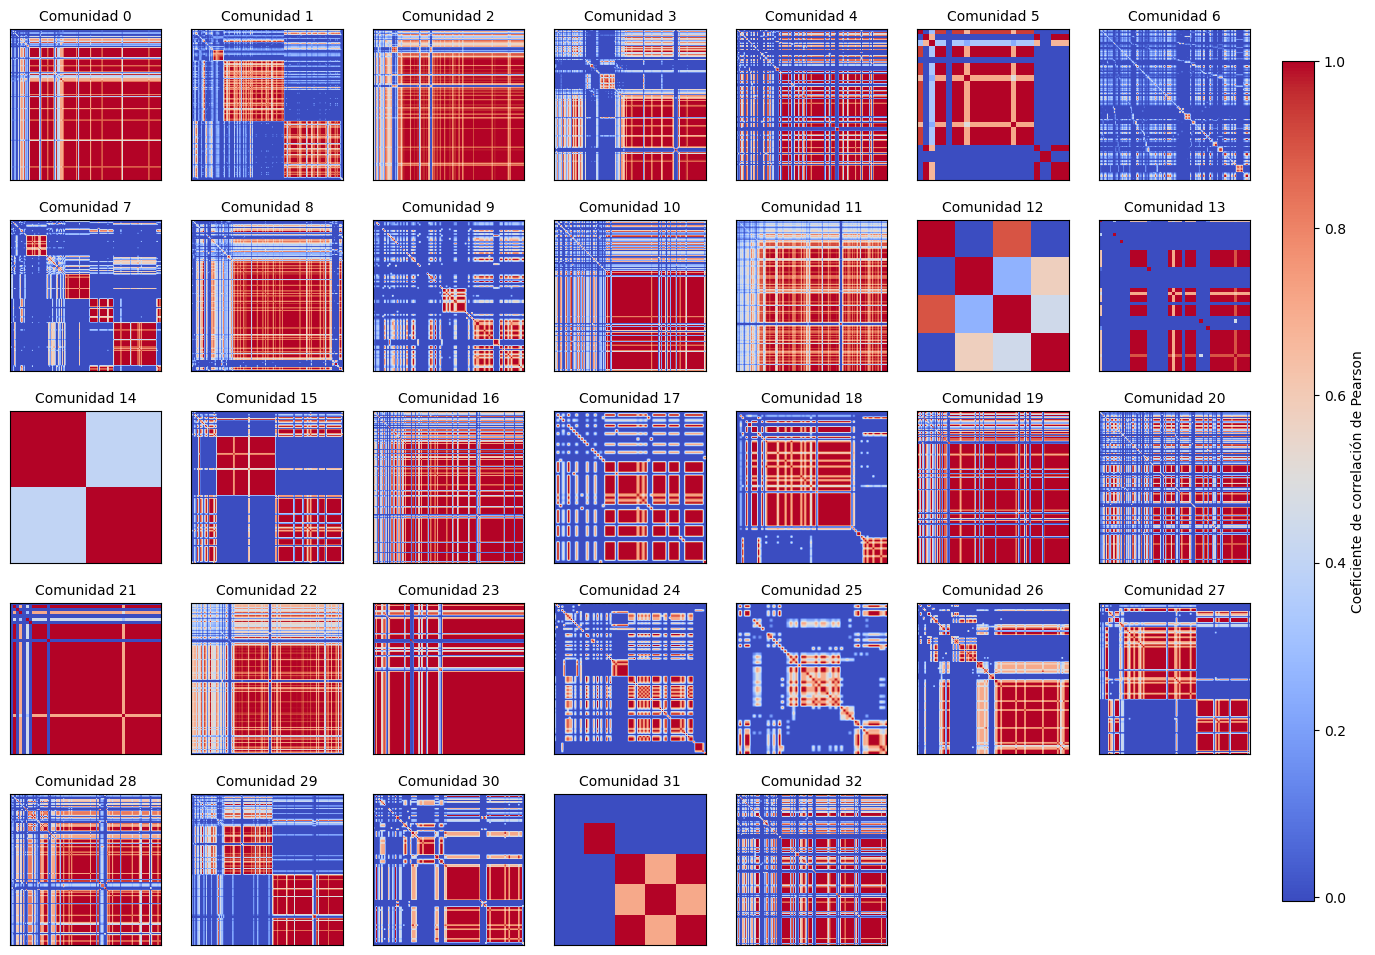

In [33]:
# Agrupar nodos por comunidad
grouped = nodes_file.groupby('modularity_class')
num_communities = grouped.ngroups

# Crear subfiguras (6x6 = 36 espacios, ajustable)
cols = 7
rows = int(np.ceil(num_communities / cols))

fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
axes = axes.flatten()

# Determinar el rango común de colores para todas las subfiguras
vmin = ady_pearson.min().min()
vmax = ady_pearson.max().max()

# Generar un heatmap por comunidad
for i, (community, group) in enumerate(grouped):
    node_ids = group['Id'].tolist()
    submatrix = ady_pearson.loc[node_ids, node_ids].fillna(0)

    ax = axes[i]
    im = ax.imshow(submatrix, cmap='coolwarm', vmin=vmin, vmax=vmax)
    ax.set_title(f'Comunidad {community}', fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

# Eliminar subfiguras vacías
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Añadir una única barra de color para todos los subplots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax, label='Coeficiente de correlación de Pearson')

# Guardar figura
plt.savefig('Figures/heatmaps_by_community.svg', dpi=300, bbox_inches='tight')
plt.show()

Además, se calculó la similitud media entre todos los pares de nodos pertenecientes a una misma comunidad y el error estándar. La similitud dentro de los grupos se comparó con la de entre usuarios pertenecentes a diferentes comunidades con la prueba de la U de Mann-Whitney. Los resultados del test se representaron en un gráfico de barras.

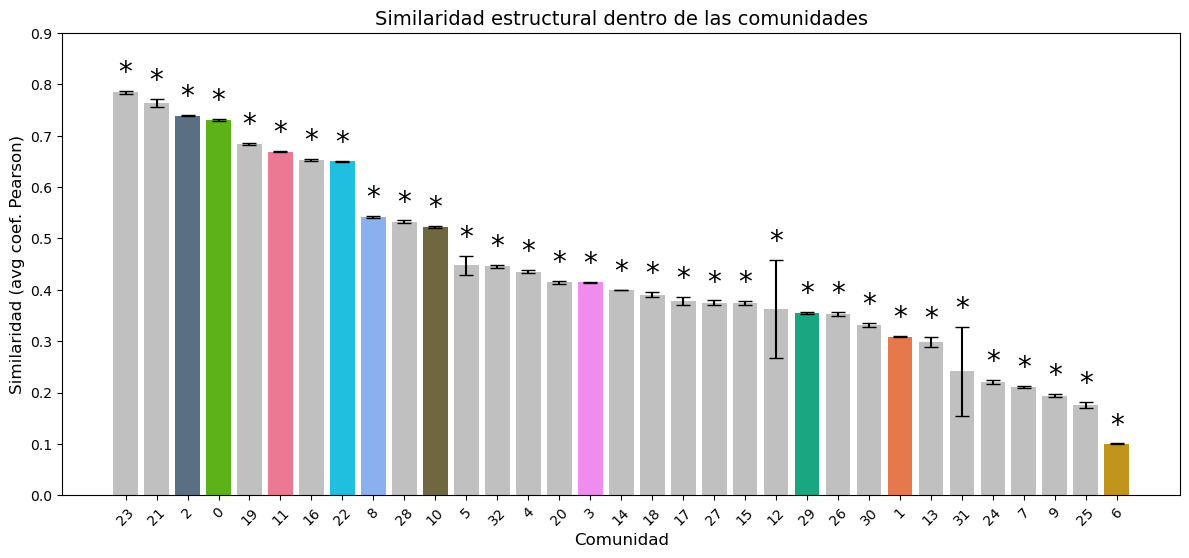

In [35]:
within_sims = {}
outside_sims = {}

# Obtener la similitud entre los pares de nodos dentro y fuera de las comunidades
for community, nodes_in_community in community_dict.items():
    submatrix = ady_pearson.loc[nodes_in_community, nodes_in_community]
    vals_within = submatrix.values
    np.fill_diagonal(vals_within, np.nan)
    vals_within = vals_within[~np.isnan(vals_within)]
    within_sims[community] = vals_within

    nodes_outside = [node for node in node_list if node not in nodes_in_community]
    submatrix_out = ady_pearson.loc[nodes_in_community, nodes_outside].values.flatten()
    outside_sims[community] = submatrix_out

# Calcular medias y desviación estándar dentro de las comunidades
mean_within = {c: np.mean(vals) for c, vals in within_sims.items()}
sem_within = {c: np.std(vals, ddof=1)/np.sqrt(len(vals)) for c, vals in within_sims.items()}

# Realizar test estadístico no paramétrico (Mann-Whitney U)
significance = {}
for c in community_dict.keys():
    stat, pval = mannwhitneyu(within_sims[c], outside_sims[c], alternative='greater')
    significance[c] = pval

# Crear dataframe con los resultados del test
df_plot = nodes_by_module[['modularity_class']].drop_duplicates().copy()
df_plot['mean_within'] = df_plot['modularity_class'].map(mean_within)
df_plot['sem_within'] = df_plot['modularity_class'].map(sem_within)
df_plot['pval'] = df_plot['modularity_class'].map(significance)

# Ordenar por media de similitud y representar resultados
df_plot = df_plot.sort_values('mean_within', ascending=False)

plt.figure(figsize=(12,7))
ax = sns.barplot(
    x='modularity_class',
    y='mean_within',
    data=df_plot,
    palette=modularity_palette,  hue='modularity_class',
    order=df_plot['modularity_class']
)

# Añadir barras de error
for i, (mean, sem) in enumerate(zip(df_plot['mean_within'], df_plot['sem_within'])):
    ax.errorbar(i, mean, yerr=sem, fmt='none', c='black', capsize=5)

# Añadir asteriscos para p<0.05
for i, (p, mean, sem) in enumerate(zip(df_plot['pval'], df_plot['mean_within'], df_plot['sem_within'])):
    if p < 0.05:
        ax.text(i, mean + sem + 0.02, '*', fontsize=20, ha='center')

plt.title('Similaridad estructural dentro de las comunidades', fontsize=14)
plt.xlabel('Comunidad', fontsize=12)
plt.ylabel('Similaridad (avg coef. Pearson)', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0,0.9)
plt.tight_layout()
plt.legend().remove()
plt.grid(False)
plt.savefig('Figures/modularity_homophily_with_errors.svg')
plt.show()

------------------------
## APRENDIZAJE AUTOMÁTICO NO SUPERVISADO

En esta sección se han analizado los resultados del clustering que se llevó a cabo en WEKA. Los resultados se exportaron en un fichero CSV (`em-results.csv`). Este archivo contiene para cada nodo los valores de las métricas de centralidad normalizadas y el clúster al que fueron asignados. 

In [37]:
clustering_results = pd.read_csv("weka-EM-results/em-results.csv")
clustering_results.columns = clustering_results.columns.str.replace("'", "", regex=False)
nodes_file['Cluster'] = clustering_results['Cluster']
nodes_file[['Id', 'Cluster']].to_csv("weka-EM-results/clusters.csv", index=False)
nodes_file.head()

,Id,Label,0,1,2,3,4,5,6,componentnumber,...,betweenesscentrality,Authority,Hub,pageranks,strongcompnum,modularity_class,stat_inf_class,clustering,eigencentrality,Cluster
0,71,eldiario.es,1,59.086090,-56.779053,8.576470,717,0,"rgb(1,115,178)",0,...,0.000000,0.920711,0.000000,0.024930,0,11,1,0.001597,1.000000,cluster2
1,45,carnecrudaradio.bsky.social,3,-60.446854,86.535301,8.359574,577,14,"rgb(2,158,115)",0,...,237968.883333,0.359771,0.035811,0.024023,114,2,1,0.002065,0.810783,cluster2
2,30,sarariveiro.bsky.social,2,-56.657166,203.688522,8.293419,540,110,"rgb(222,143,5)",0,...,399094.533333,0.075902,0.056267,0.029727,114,22,1,0.002100,0.942685,cluster2
3,1246,elmundotoday.com,1,-196.528412,-52.630035,7.525453,250,2,"rgb(1,115,178)",0,...,565.083333,0.049424,0.002391,0.007907,54,0,1,0.000316,0.254775,cluster2
4,166,juanlusanchez.bsky.social,6,115.416168,-40.601414,7.451038,232,53,"rgb(202,145,97)",0,...,207980.450000,0.048776,0.000322,0.013216,114,3,1,0.004606,0.350833,cluster2


### Análisis exploratorio de los clústeres

A partir de los valores de centralidad, se ha calculado el coeficiente de Silhouette del clustering. 

In [40]:
# Evaluate clustering results
centrality_metrics = [
    'weighted indegree',
    'weighted outdegree',
    'closnesscentrality',
    'betweenesscentrality',
    'pageranks',
    'eigencentrality'
]

clustering_results['Cluster_num'] = clustering_results['Cluster'].astype(str).str[-1].astype(int)

silhouette_score(clustering_results[centrality_metrics].to_numpy(), 
                clustering_results['Cluster_num'].to_numpy(),
                random_state=42)

0.022042382204451635

En este caso se observa que las cinco cuentas de partidas se han agrupado juntas. 

In [42]:
podcast_bsky = ['sarariveiro.bsky.social', 'juanlusanchez.bsky.social', 'carnecrudaradio.bsky.social', 
               'punzadas.bsky.social', 'elordenmundial.bsky.social']
podcasts_cluster = nodes_file[nodes_file['Label'].isin(podcast_bsky)][['Id', 'Label', 'Cluster']]
podcasts_cluster

,Id,Label,Cluster
1,45,carnecrudaradio.bsky.social,cluster2
2,30,sarariveiro.bsky.social,cluster2
4,166,juanlusanchez.bsky.social,cluster2
5,140,elordenmundial.bsky.social,cluster2
40,0,punzadas.bsky.social,cluster2


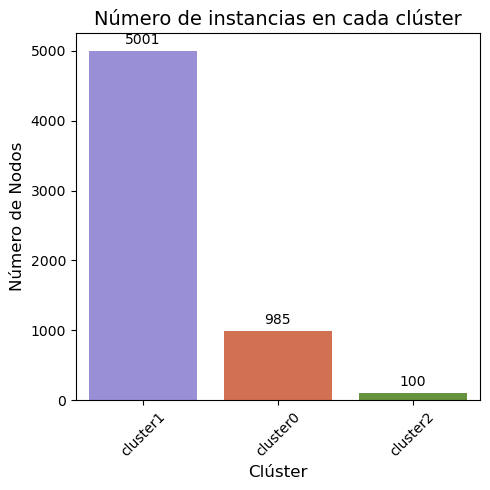

In [43]:
# Crear paleta de colores para que coincida con la de Gephi
cluster_palette = {
    'cluster0': '#E7663B',
    'cluster1': '#9183E2',
    'cluster2': '#67A030'
}

# Ordenar los clústeres por tamaño
nodes_file['Cluster'] = nodes_file['Cluster'].astype(str)
nodes_by_module = nodes_file.groupby('Cluster', as_index=False)['Id'].count().sort_values('Id', ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(5, 5))
ax = sns.barplot(
    x='Cluster', y='Id',
    data=nodes_by_module,
    palette=cluster_palette, hue='Cluster',
    order=nodes_by_module['Cluster']
)
# Añadir número de usuarios
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10)

plt.title('Número de instancias en cada clúster', fontsize=14)
plt.xlabel('Clúster', fontsize=12)
plt.ylabel('Número de Nodos', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.grid(False)
plt.show()

Aunque no se han incluido en la memoria, también se han computado algunas estadísticas de los valores de centralidad para cada clúster. 

In [45]:
columns_to_plot = [
    'weighted indegree',
    'weighted outdegree',
    'closnesscentrality',
    'betweenesscentrality',
    'pageranks',
    'eigencentrality'
]

#Compute mean values for each metric

cluster_means = nodes_file.groupby('Cluster')[columns_to_plot].mean()
cluster_means

,weighted indegree,weighted outdegree,closnesscentrality,betweenesscentrality,pageranks,eigencentrality
Cluster,,,,,,
cluster0,2.044670,2.378680,0.385838,109.506455,0.000190,0.012813
cluster1,0.087982,1.216957,0.621954,0.046176,0.000044,0.000096
cluster2,72.300000,12.550000,0.291771,19696.642167,0.002863,0.098794


In [46]:
cluster_medians = nodes_file.groupby('Cluster')[columns_to_plot].median()
cluster_medians

,weighted indegree,weighted outdegree,closnesscentrality,betweenesscentrality,pageranks,eigencentrality
Cluster,,,,,,
cluster0,2.0,2.0,0.308316,1.0,0.000117,0.002383
cluster1,0.0,1.0,0.600000,0.0,0.000042,0.000000
cluster2,20.0,3.5,0.273381,2301.0,0.001161,0.047866


Asimismo, también se ha representado la distribución de las métricas de centralidad para cada clúster en forma de diagrama de cajas y bigotes para estudiar la variabilidad interna dentro de cada grupo y caracterizar cada clúster por su rol en la red.

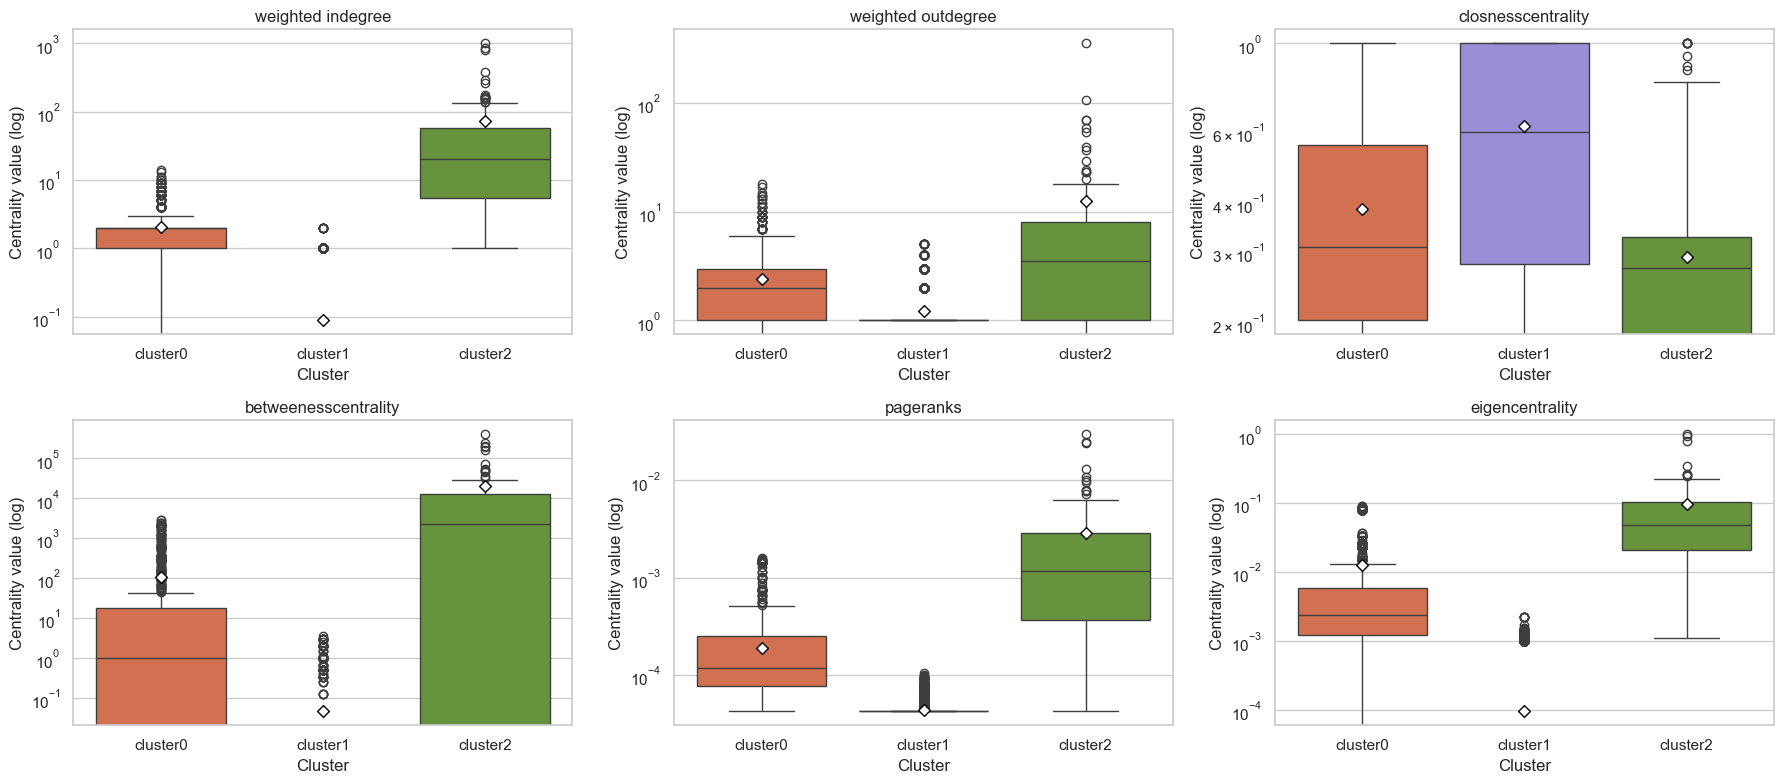

In [48]:
# Especificar métricas de interés
columns_to_plot = [
    'weighted indegree',
    'weighted outdegree',
    'closnesscentrality',
    'betweenesscentrality',
    'pageranks',
    'eigencentrality'
]

# Ordenar los grupos por el número de clúster
nodes_file['Cluster'] = nodes_file['Cluster'].astype(str)
cluster_order = sorted(nodes_file['Cluster'].unique())

# Crear boxplots
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

for ax, col in zip(axes.flat, columns_to_plot):
    sns.boxplot(x='Cluster', y=col, hue='Cluster', data=nodes_file,
                order=cluster_order, hue_order=cluster_order,
                palette=cluster_palette, ax=ax, legend=False)

    # Añadir medias
    means = nodes_file.groupby('Cluster')[col].mean().reindex(cluster_order)
    
    ax.scatter(x=range(len(cluster_order)), y=means, 
               color='white', marker='D', edgecolor='black',
               label='Mean', zorder=5)

    ax.set_title(col)
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Centrality value (log)")
    ax.set_yscale('log')

plt.tight_layout()
plt.savefig('Figures/centrality_metrics_clusters.svg')
plt.show()

### Similitud estructural

Al igual que con las comunidades, la matriz de correlaciones de la red se segmentó en cada uno de los clústeres. Las matrices resultantes se representaron en forma de mapas de calor.

In [50]:
# Obtener los nodos y las comunidades
node_list = nodes_file['Id'].tolist()
communities = nodes_file['Cluster'].tolist()

# Crear un diccionario que agrupe los nodos por comunidad
community_dict = {}
for node, community in zip(node_list, communities):
    if community not in community_dict:
        community_dict[community] = []
    community_dict[community].append(node)

# Calcular la similitud promedio dentro de cada comunidad
community_similarities = {}

for community, nodes_in_community in community_dict.items():
    # Filtramos las filas y columnas correspondientes a los nodos de esta comunidad
    submatrix = ady_pearson.loc[nodes_in_community, nodes_in_community]
    
    # Convertir la submatriz a un array de valores, y eliminar los valores de la diagonal
    submatrix_values = submatrix.values
    np.fill_diagonal(submatrix_values, np.nan)  # Ponemos NaN en la diagonal para no contar la autosemejanza
    
    # Calcular la similitud promedio (promedio de las correlaciones)
    avg_similarity = np.nanmean(submatrix_values)  # Promedio de los valores no NaN
    community_similarities[community] = avg_similarity

nodes_by_module['avg_similarity'] = nodes_by_module['Cluster'].map(community_similarities)

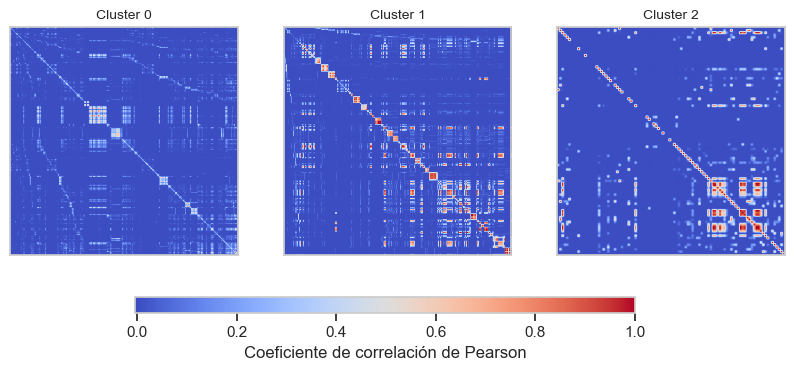

In [51]:
# Agrupar nodos por comunidad
grouped = nodes_file.groupby('Cluster')
num_communities = grouped.ngroups

# Crear subfiguras (e.g., 3 columnas)
cols = 3
rows = int(np.ceil(num_communities / cols))

fig, axes = plt.subplots(rows, cols, figsize=(10, 8))
axes = axes.flatten()

# Determinar el rango común de colores para todas las subfiguras
vmin = ady_pearson.min().min()
vmax = ady_pearson.max().max()

# Generar un heatmap por comunidad
for i, (community, group) in enumerate(grouped):
    node_ids = group['Id'].tolist()
    submatrix = ady_pearson.loc[node_ids, node_ids].fillna(0)

    ax = axes[i]
    im = ax.imshow(submatrix, cmap='coolwarm', vmin=vmin, vmax=vmax)
    ax.set_title(f'Cluster {community[-1]}', fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

# Eliminar subfiguras vacías
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Añadir la barra de color horizontal debajo de todas las subfiguras
cbar_ax = fig.add_axes([0.25, 0.28, 0.5, 0.02])  # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax, orientation='horizontal', label='Coeficiente de correlación de Pearson')

# Guardar figura
plt.savefig('Figures/heatmaps_by_cluster.svg', dpi=300, bbox_inches='tight')
plt.show()

Además, se representó la similitud estructural media dentro de cada grupo y se comparó con la distancia entre grupos usando el test no paramétrico de la U de Mann Whitney. 

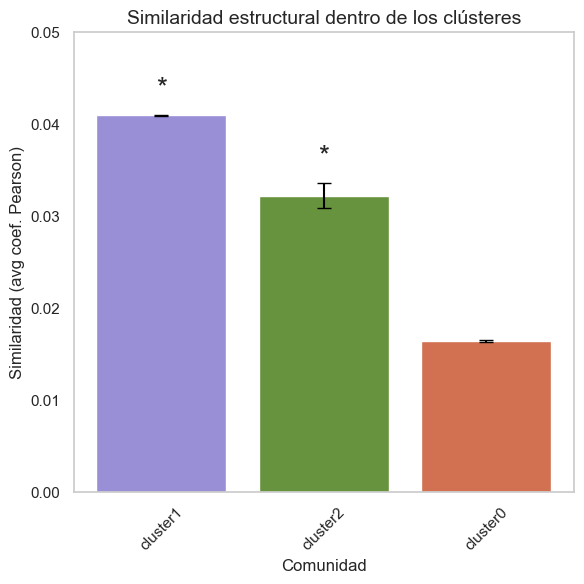

In [53]:
within_sims = {}
outside_sims = {}

for community, nodes_in_community in community_dict.items():
    submatrix = ady_pearson.loc[nodes_in_community, nodes_in_community]
    vals_within = submatrix.values
    np.fill_diagonal(vals_within, np.nan)
    vals_within = vals_within[~np.isnan(vals_within)]
    within_sims[community] = vals_within

    nodes_outside = [node for node in node_list if node not in nodes_in_community]
    submatrix_out = ady_pearson.loc[nodes_in_community, nodes_outside].values.flatten()
    outside_sims[community] = submatrix_out

# Calculamos medias y SEM para dentro
mean_within = {c: np.mean(vals) for c, vals in within_sims.items()}
sem_within = {c: np.std(vals, ddof=1)/np.sqrt(len(vals)) for c, vals in within_sims.items()}

# Test estadístico no paramétrico (Mann-Whitney U, Wilcoxon)
significance = {}
for c in community_dict.keys():
    stat, pval = mannwhitneyu(within_sims[c], outside_sims[c], alternative='greater')
    significance[c] = pval

# Preparamos DataFrame para graficar con seaborn
df_plot = nodes_by_module[['Cluster']].drop_duplicates().copy()
df_plot['mean_within'] = df_plot['Cluster'].map(mean_within)
df_plot['sem_within'] = df_plot['Cluster'].map(sem_within)
df_plot['pval'] = df_plot['Cluster'].map(significance)

# Ordenamos por media descendente para la gráfica
df_plot = df_plot.sort_values('mean_within', ascending=False)

plt.figure(figsize=(6, 6))
ax = sns.barplot(
    x='Cluster',
    y='mean_within',
    data=df_plot,
    palette=cluster_palette,  hue='Cluster',
    order=df_plot['Cluster']
)

# Añadimos barras de error manualmente (porque seaborn barplot no siempre las maneja bien con custom data)
for i, (mean, sem) in enumerate(zip(df_plot['mean_within'], df_plot['sem_within'])):
    ax.errorbar(i, mean, yerr=sem, fmt='none', c='black', capsize=5)

# Añadimos asteriscos para significancia p<0.05
for i, (p, mean, sem) in enumerate(zip(df_plot['pval'], df_plot['mean_within'], df_plot['sem_within'])):
    if p < 0.05:
        ax.text(i, mean + sem + 0.002, '*', fontsize=20, ha='center')

plt.title('Similaridad estructural dentro de los clústeres', fontsize=14)
plt.xlabel('Comunidad', fontsize=12)
plt.ylabel('Similaridad (avg coef. Pearson)', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0,0.05)
plt.tight_layout()
plt.legend([],[], frameon=False)
plt.grid(False)
plt.savefig('Figures/clusters_str_homophily_with_errors.svg')
plt.show()

### Similitud funcional

Para calcular la similitud funcional entre los pares de nodos de cada clúster, se tomó el dataframe con los valores de las métricas de centralidad y calculó el coeficiente de correlación de pearson para cada una de las parejas de nodos, generando una matriz de correlaciones para cada clúster. Los resultados se representaron en forma de mapas de calor.

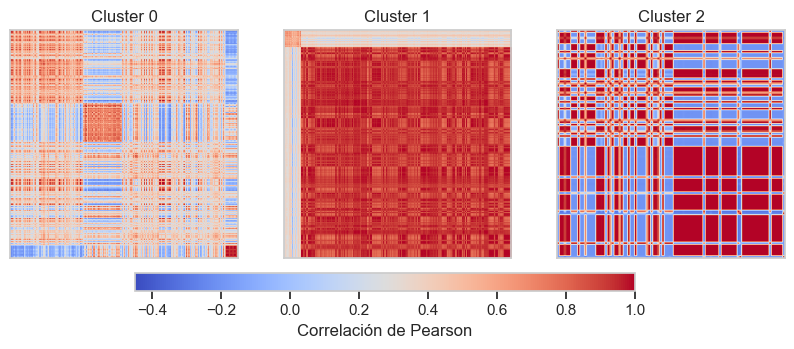

In [55]:
# Agrupar nodos por clúster
grouped = nodes_file.groupby('Cluster')
num_clusters = grouped.ngroups

# Crear subfiguras: 1 fila, 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(10, 6))
axes = axes.flatten()

# Determinar valores globales para colorbar
all_values = []

# Primero calculamos todas las matrices de correlación para normalizar el color
for cluster, group in grouped:
    features = group[columns_to_plot].fillna(0)
    corr_matrix = np.corrcoef(features)
    corr_matrix = np.nan_to_num(corr_matrix)  # Reemplazar NaNs por 0
    all_values.append(corr_matrix)

# Unir todas las matrices para definir vmin y vmax global
all_concat = np.concatenate([m.flatten() for m in all_values])
vmin = all_concat.min()
vmax = all_concat.max()

# Graficar heatmaps
for i, (cluster, group) in enumerate(grouped):
    features = group[columns_to_plot].fillna(0)
    corr_matrix = np.corrcoef(features)
    corr_matrix = np.nan_to_num(corr_matrix)

    ax = axes[i]
    im = ax.imshow(corr_matrix, cmap='coolwarm', vmin=vmin, vmax=vmax)
    ax.set_title(f'Cluster {cluster[-1]}', fontsize=12)
    ax.set_xticks([])
    ax.set_yticks([])

# Añadir barra de color horizontal
cbar_ax = fig.add_axes([0.25, 0.25, 0.5, 0.03])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal', label='Correlación de Pearson')

plt.savefig('Figures/cluster_functional_homophily_pearson.svg', dpi=300)
plt.show()

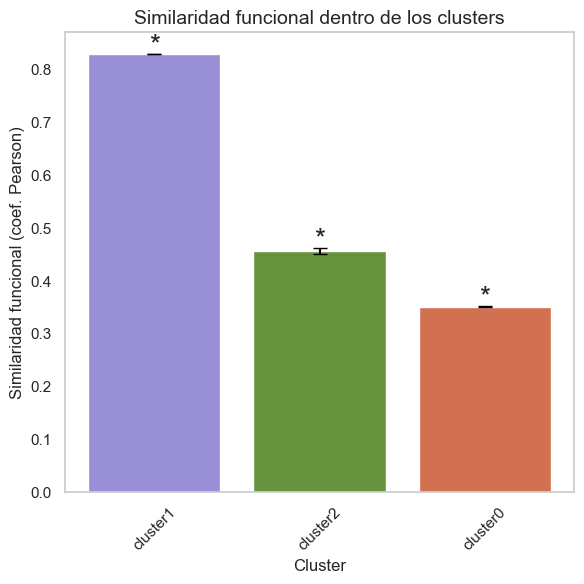

In [56]:
# Lista de nodos y clusters
node_list = nodes_file['Id'].tolist()
clusters = nodes_file['Cluster'].tolist()

# Diccionario: nodos por cluster
cluster_dict = {}
for node, cluster in zip(node_list, clusters):
    cluster_dict.setdefault(cluster, []).append(node)

# Calcular la matriz de correlación funcional entre nodos (basada en features)
# Creamos matriz funcional completa para todos los nodos
features_all = nodes_file[columns_to_plot].fillna(0)
corr_func_matrix = np.corrcoef(features_all.T)  # ¿Quieres correlación entre features o entre nodos? 
# Para correlación entre nodos:
corr_func_matrix = np.corrcoef(features_all)  # filas = nodos

# Creamos DataFrame con índices de nodos para fácil slicing
corr_func_df = pd.DataFrame(corr_func_matrix, index=nodes_file['Id'], columns=nodes_file['Id'])

# Calculamos similitud dentro y fuera para cada cluster
within_sims_func = {}
outside_sims_func = {}

for cluster, nodes_in_cluster in cluster_dict.items():
    submatrix = corr_func_df.loc[nodes_in_cluster, nodes_in_cluster].values
    np.fill_diagonal(submatrix, np.nan)
    vals_within = submatrix[~np.isnan(submatrix)]
    within_sims_func[cluster] = vals_within
    
    nodes_outside = [node for node in node_list if node not in nodes_in_cluster]
    vals_outside = corr_func_df.loc[nodes_in_cluster, nodes_outside].values.flatten()
    outside_sims_func[cluster] = vals_outside

# Media y SEM dentro cluster
mean_within_func = {c: np.mean(vals) for c, vals in within_sims_func.items()}
sem_within_func = {c: np.std(vals, ddof=1)/np.sqrt(len(vals)) for c, vals in within_sims_func.items()}

# Test Mann-Whitney U (Wilcoxon no paramétrico)
significance_func = {}
for c in cluster_dict.keys():
    stat, pval = mannwhitneyu(within_sims_func[c], outside_sims_func[c], alternative='greater')
    significance_func[c] = pval

# Preparamos DataFrame para seaborn
df_func = nodes_file[['Cluster']].drop_duplicates().copy()
df_func['mean_within'] = df_func['Cluster'].map(mean_within_func)
df_func['sem_within'] = df_func['Cluster'].map(sem_within_func)
df_func['pval'] = df_func['Cluster'].map(significance_func)

df_func_sorted = df_func.sort_values('mean_within', ascending=False).reset_index(drop=True)

plt.figure(figsize=(6,6))
ax = sns.barplot(
    x='Cluster',
    y='mean_within', 
    data=df_func_sorted,
    palette=cluster_palette,
    hue='Cluster',
    order=df_func_sorted['Cluster'])

# Barras de error con el df ordenado
for i, (mean, sem) in enumerate(zip(df_func_sorted['mean_within'], df_func_sorted['sem_within'])):
    ax.errorbar(i, mean, yerr=sem, fmt='none', c='black', capsize=5)

# Asteriscos significativos con df ordenado
for i, (p, mean, sem) in enumerate(zip(df_func_sorted['pval'], df_func_sorted['mean_within'], df_func_sorted['sem_within'])):
    if p < 0.05:
        ax.text(i, mean + sem + 0.002, '*', fontsize=20, ha='center')

plt.title('Similaridad funcional dentro de los clusters', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Similaridad funcional (coef. Pearson)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend([],[], frameon=False)
plt.grid(False)
plt.savefig('Figures/clusters_func_homophily_with_errors.svg')
plt.show()